In [1]:
%matplotlib inline
import pylab
import sqlite3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from pandas import Series, DataFrame
import numpy as np

import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
from __future__ import division



pylab.rcParams['figure.figsize'] = (10,6)


In [2]:
conn = sqlite3.connect('/Users/Taha/Desktop/datascience/datasets/DeathRecords/database.sqlite')

query = """
Select name from sqlite_master where type = 'table';
"""
    
df_tables = pd.read_sql(query, conn)


In [3]:
query = """
Select 
    id, 
    MonthOfDeath month, 
    dayOfWeekOfDeath week_day, 
    sex sex, 
    Age age, 
    ms.description marital_status, 
    injuryAtWork,
    mod.description death_manner, 
    md.description dispose_method, 
    Autopsy, 
    r.description race, 
    ic.description cause_death,
    ac.description activity,
    e.description education
     
from deathrecords dr

join maritalStatus ms on ms.code = dr.maritalStatus
join mannerOfDeath mod on mod.code = dr.mannerOfDeath
join MethodOfDisposition md on md.code = dr.MethodOfDisposition
join Icd10Code ic on ic.code = dr.Icd10Code
join ActivityCode ac on ac.code = dr.ActivityCode
join race r on r.code = dr.race
join Education2003Revision e on e.code = dr.Education2003Revision

where agetype = 1
and age < 150

"""

# query = "select * from maritalstatus"

df = pd.read_sql(query, conn)


In [4]:
df.groupby('education').size()

education
8th grade or less                        244764
9 - 12th grade, no diploma               248019
Associate degree                         132783
Bachelor's degree                        220478
Doctorate or professional degree          36446
Master's degree                           86698
Unknown                                   45399
high school graduate or GED completed    955051
some college credit, but no degree       275517
dtype: int64

In [5]:
def education_labels(education):
    if education == '9 - 12th grade, no diploma':
        return '9-12th'
    if education == 'Doctorate or professional degree':
        return 'PhD'
    if education == 'high school graduate or GED completed':
        return 'high school'
    if education == 'some college credit, but no degree':
        return 'some college'
    else:
        return education

df['education'] = df['education'].apply(education_labels)
    

In [6]:
#deaths per season

def get_quarter(month):
    if month in (3,4,5):
        return 'spring'
    if month in (6,7,8):
        return 'summer'
    if month in (9,10,11):
        return 'fall'
    else:
        return 'winter'

df['season'] = df['month'].apply(get_quarter)


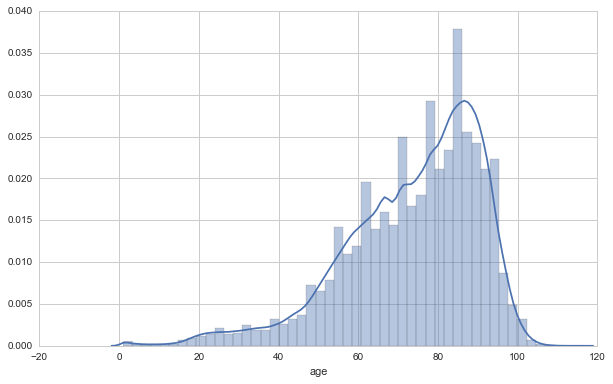

In [313]:
sns.distplot(df['age'].dropna(), bins=50)

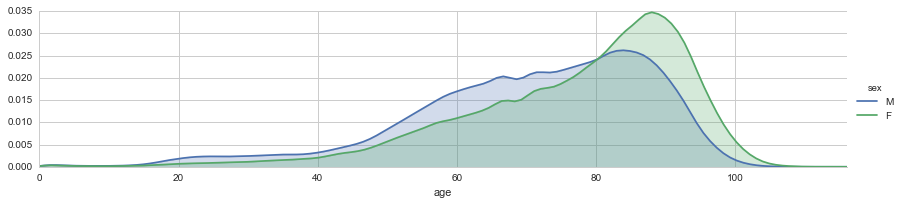

In [216]:
fig = sns.FacetGrid(df, hue = 'sex', aspect = 4)

fig.map(sns.kdeplot, 'age', shade = True)

oldest = df['age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

# based on 2014 deaths, did females live longer than males?

In [7]:
# age groups, child, teenager, young adult, adult, middle-age, young middle age, middle age, senior citizen

def get_age_group(age):
    if age > 0 and age <= 12:
        return '1-child'
    if age > 12 and age <= 19:
        return '2-teenager'
    if age > 19 and age <= 25:
        return '3-young-adult'
    if age > 25 and age <= 40:
        return '4-adult'
    if age > 40 and age <= 50:
        return '5-young-middle-age'
    if age > 50 and age <= 65:
        return '6-middle-age'
    if age > 65:
        return '7-senior-citizen'
    
df['age_group'] = df['age'].apply(get_age_group)
df = df.sort_values(by='age_group',ascending=True)

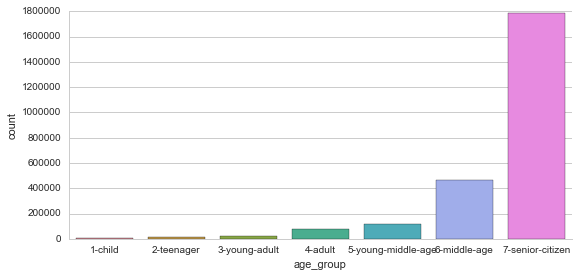

In [95]:
sns.factorplot('age_group', data = df, kind = 'count', aspect=2)

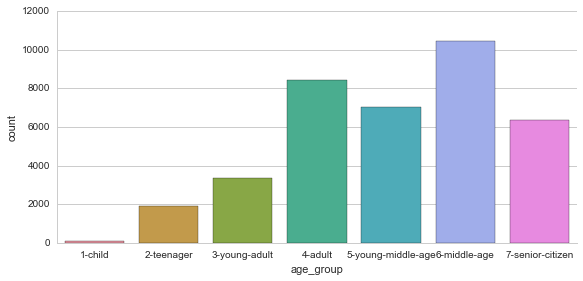

In [315]:
#suicide deaths by age groups
df_s = df.loc[df['death_manner'] == 'Suicide'] 

sns.factorplot('age_group', data = df_s, kind = 'count', aspect=2)

* child           : 0-12
* teenager        : 13-19
* young adult     : 20-25
* adult           : 26-40
* young middle age: 41-50
* middle age      : 51-65
* senior citizen  : 66+


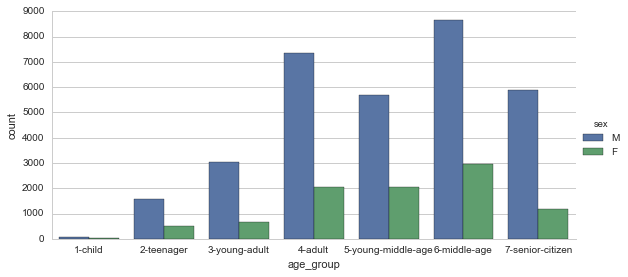

In [97]:
sns.factorplot('age_group', data = df_s, kind = 'count', aspect=2, hue='sex')

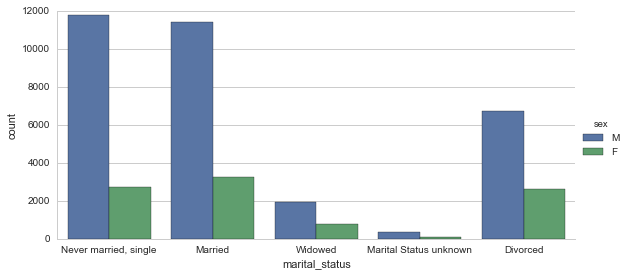

In [102]:
sns.factorplot('marital_status', data = df_s, kind = 'count', aspect=2, hue='sex')

In [8]:
df_new = df[['education','death_manner','cause_death','age_group','marital_status','sex','age','month','season','race']]

df_s = df_new.loc[df_new['death_manner'] == 'Suicide'] 


In [9]:
df_s_m = df_s.loc[ df_s['sex'] == 'M' ]
df_s_f = df_s.loc[ df_s['sex'] == 'F' ]

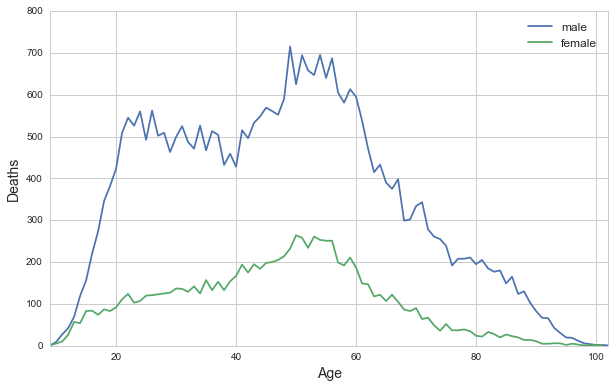

In [165]:
# df_s_m.groupby('age').size().plot()

# plt.plot(df_s_m.groupby('age').size())
# plt.plot(df_s_f.groupby('age').size())

df_s_m.groupby('age').size().plot()
df_s_f.groupby('age').size().plot()

plt.legend(['male', 'female'], loc='upper right', fontsize=12)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Deaths', fontsize=14)




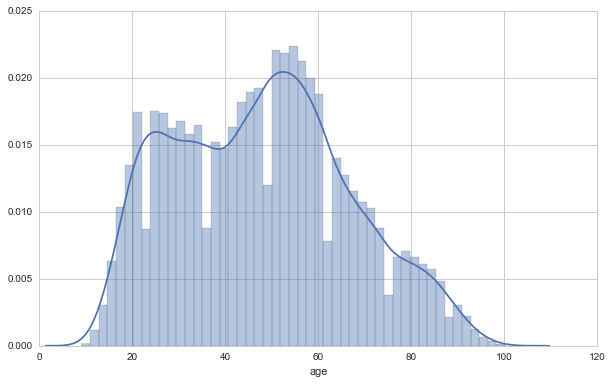

In [271]:
# male suicides
sns.distplot(df_s_m['age'].dropna(), bins=50)

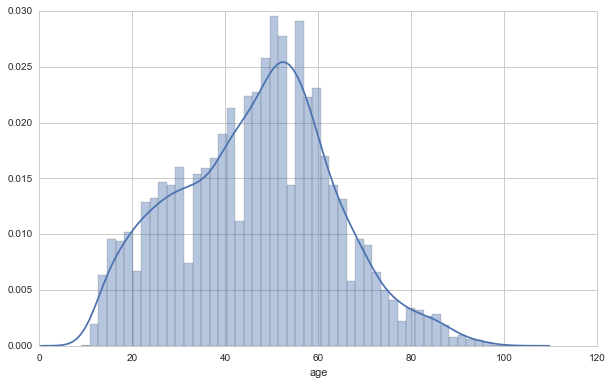

In [272]:
#female suicides
sns.distplot(df_s_f['age'].dropna(), bins=50)

In [273]:
print "female mean age: ", df['age'][df['sex']=='F'].mean()
print "male mean age: "  , df['age'][df['sex']=='M'].mean()

female mean age:  76.9435955402
male mean age:  70.520874057


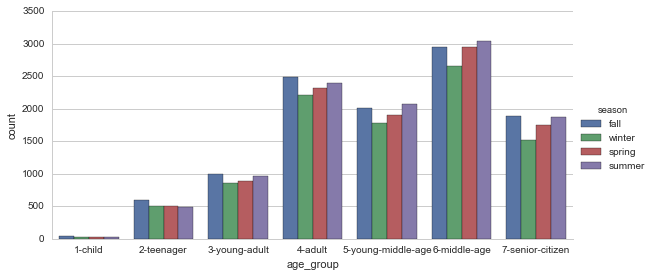

In [166]:
sns.factorplot('age_group', data = df_s, kind = 'count', aspect=2, hue='season')

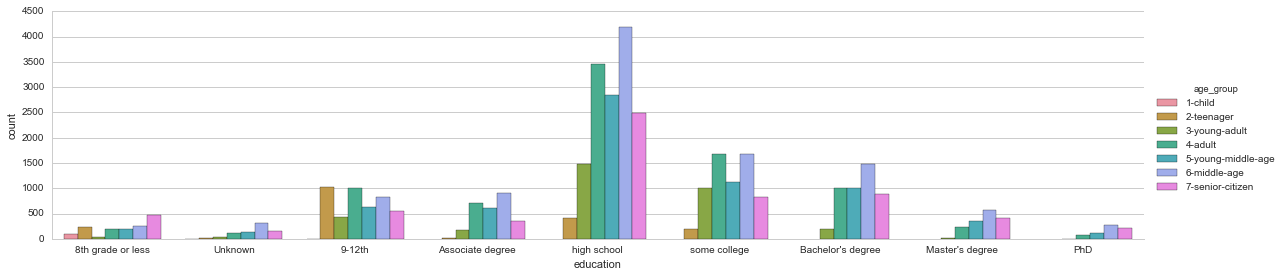

In [246]:
sns.factorplot('education', data = df_s, kind = 'count', aspect=4, hue='age_group')

In [249]:
df_s_senior = df_s[ df_s['age_group'] == '7-senior-citizen']

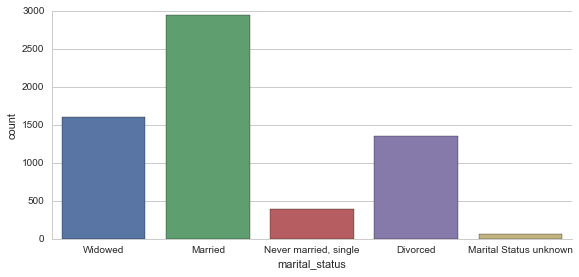

In [269]:
sns.factorplot('marital_status', data = df_s_senior, aspect=2, kind='count')

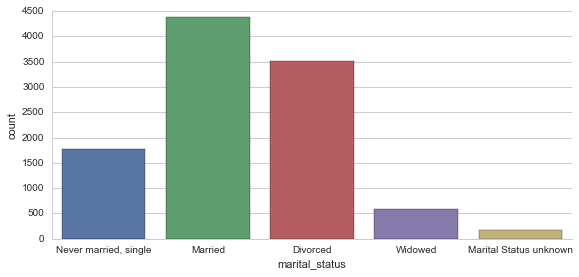

In [254]:
df_s_middle = df_s[ df_s['age_group'] == '6-middle-age']
sns.factorplot('marital_status', data = df_s_middle, kind = 'count', aspect=2)

In [281]:
df_s.groupby('race').size()

race
American Indian (includes Aleuts and Eskimos)                                                                    457
Asian Indian                                                                                                     135
Black                                                                                                           2026
Chinese                                                                                                          201
Combined other Asian or Pacific Islander, includes codes 18-68 for areas that do not report them separately       80
Filipino                                                                                                         129
Guamanian                                                                                                          6
Hawaiian (includes Part-Hawaiian)                                                                                  5
Japanese                                                   

black
asian indian
chinese, filipino, japanese, korean, Other Asian or Pacific Islander in areas reporting codes 18-58, vietnamese
white




In [323]:
df.groupby('death_manner').size().order(ascending=False)

death_manner
Natural                  1766942
Not specified             303165
Accident                  113401
Suicide                    37618
Homicide                   14371
Could not determine         6873
Pending investigation       2785
dtype: int64

In [322]:
df.groupby('cause_death').size().order(ascending=False)

cause_death
Atherosclerotic heart disease                                                                                       142435
Malignant neoplasm: Bronchus or lung, unspecified                                                                   133791
Unspecified dementia                                                                                                101635
Acute myocardial infarction, unspecified                                                                             99969
Chronic obstructive pulmonary disease, unspecified                                                                   93198
Alzheimer disease, unspecified                                                                                       79325
Stroke, not specified as haemorrhage or infarction                                                                   56279
Atherosclerotic cardiovascular disease, so described                                                                 52134
Cong

In [10]:
df_natural = df[ df['death_manner'] == 'Natural' ] 
df_natural.groupby('cause_death').size().order(ascending=False)[0:10]

cause_death
Atherosclerotic heart disease                           118296
Malignant neoplasm: Bronchus or lung, unspecified       115637
Unspecified dementia                                     90496
Acute myocardial infarction, unspecified                 85560
Chronic obstructive pulmonary disease, unspecified       80453
Alzheimer disease, unspecified                           63376
Stroke, not specified as haemorrhage or infarction       47514
Atherosclerotic cardiovascular disease, so described     46910
Congestive heart failure                                 43065
Pneumonia, unspecified                                   31558
dtype: int64

In [16]:
df_dimentia = df[ df['cause_death'] == 'Unspecified dementia' ] 

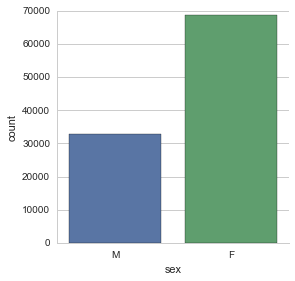

In [335]:
sns.factorplot('sex', data=df_dimentia, kind='count')

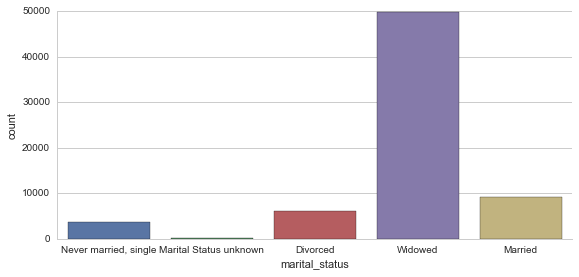

In [22]:
df_dimentia_f = df_dimentia[ df_dimentia['sex'] == 'F' ]

sns.factorplot('marital_status', data=df_dimentia_f, kind='count', aspect = 2)

In [ ]:
sns.factorplot('sex', data=df_dimentia, kind='count')

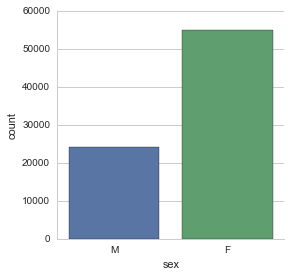

In [24]:
df_alzheimer = df[ df['cause_death'] == 'Alzheimer disease, unspecified' ] 
sns.factorplot('sex', data=df_alzheimer, kind='count')

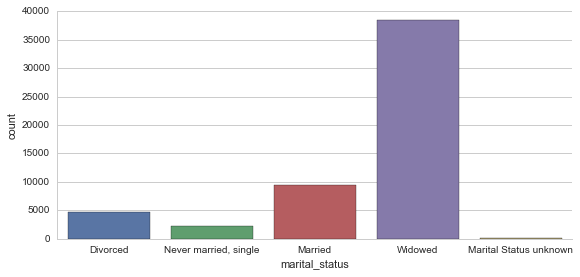

In [25]:
df_alzheimer_f = df_alzheimer[ df_alzheimer['sex'] == 'F' ]

sns.factorplot('marital_status', data=df_alzheimer_f, kind='count', aspect = 2)

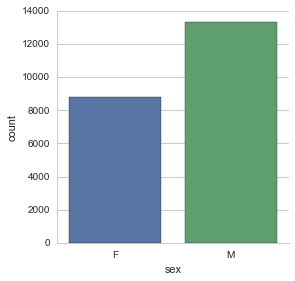

In [365]:
df_parkinson = df[ df['cause_death'] == 'Parkinson disease' ] 
sns.factorplot('sex', data=df_parkinson, kind='count')

In [11]:
# df_cause = DataFrame(df_natural.groupby(('cause_death','sex')).size()).rename( columns={0: 'count'} )
# df_cause[0:20]

df_cause = DataFrame(df_natural.groupby(('cause_death')).size().order(ascending=False)[0:10]).rename( columns={0: 'count'} )


In [12]:
df_cause['cause'] = df_cause.index


In [13]:
# get top 10 causes of death for a bar graph to see male vs female distribution
def get_top_causes(cause_death):
        if cause_death in df_cause['cause']:
            return cause_death

df_causes_top = df[ df['cause_death'] == df['cause_death'].apply(get_top_causes) ]

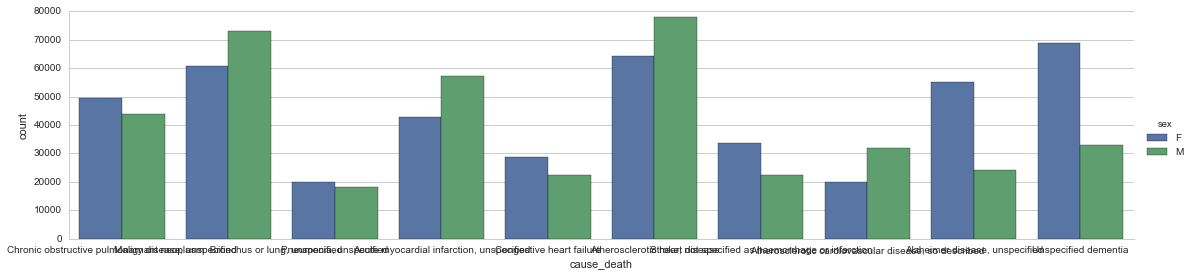

In [14]:
sns.factorplot('cause_death', data=df_causes_top, kind='count', hue='sex', aspect=4)

In [15]:
df_causes_top.groupby(('cause_death', 'sex')).size()

cause_death                                           sex
Acute myocardial infarction, unspecified              F      42694
                                                      M      57275
Alzheimer disease, unspecified                        F      55014
                                                      M      24311
Atherosclerotic cardiovascular disease, so described  F      20081
                                                      M      32053
Atherosclerotic heart disease                         F      64280
                                                      M      78155
Chronic obstructive pulmonary disease, unspecified    F      49390
                                                      M      43808
Congestive heart failure                              F      28769
                                                      M      22423
Malignant neoplasm: Bronchus or lung, unspecified     F      60583
                                                      M      73208
Pneu